In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [4]:
df_train = pd.read_csv('file:///C://Users/Lenovo/Desktop/Data/SalaryData_Train(1).csv')
df_test = pd.read_csv('file:///C://Users/Lenovo/Desktop/Data/SalaryData_Test(1).csv')

df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [9]:
str_cols = ['workclass','education','maritalstatus','occupation','relationship','race','sex','native']

In [10]:
le = LabelEncoder()

for i in str_cols:
    df_train[i]=le.fit_transform(df_train[i])
    df_test[i]=le.fit_transform(df_test[i])

In [11]:
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K


In [12]:
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K


**Exploratory Data Analysis**

In [13]:
df_train.describe()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
count,30161.000000,30161.00000,30161.00000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,2.19933,10.33361,10.121316,2.580087,5.959849,1.418322,3.678592,0.675707,1092.044064,88.302311,40.931269,35.413481
std,13.134830,0.95394,3.81226,2.550037,1.498018,4.029633,1.601361,0.834721,0.468118,7406.466611,404.121321,11.980182,5.956430
min,17.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,2.00000,9.00000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,37.000000
50%,37.000000,2.00000,11.00000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,37.000000
75%,47.000000,2.00000,12.00000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,37.000000
max,90.000000,6.00000,15.00000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,39.000000


In [14]:
df_train.shape

(30161, 14)

In [15]:
df_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [16]:
df_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [23]:
mapping = {' >50K': 1, ' <=50K': 2}

In [24]:
df_train = df_train.replace({'Salary': mapping})
df_test = df_test.replace({'Salary': mapping})

In [29]:
df = df_train.append(df_test)

In [30]:
df.describe()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.548086,2.204507,10.313217,10.118463,2.585148,5.969572,1.412684,3.680281,0.675062,1101.454700,88.548617,40.938038,35.431503,1.752151
std,13.217981,0.958132,3.816992,2.552909,1.500460,4.026444,1.597242,0.832361,0.468357,7506.511295,404.838249,12.007640,5.931380,0.431769
min,17.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,28.000000,2.000000,9.000000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,37.000000,2.000000
50%,37.000000,2.000000,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,37.000000,2.000000
75%,47.000000,2.000000,12.000000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,37.000000,2.000000
max,90.000000,6.000000,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,39.000000,2.000000


In [31]:
df.shape

(45221, 14)

<AxesSubplot:>

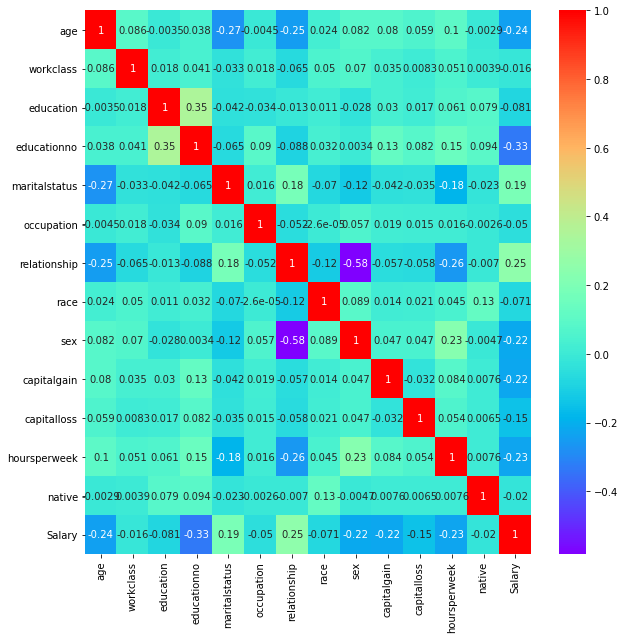

In [36]:
corr = df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='rainbow')

# SVM Model

In [39]:
from sklearn.model_selection import train_test_split

In [42]:
col = df.columns

x_train = df_train[col[0:13]]
y_train = df_train[col[13]]
x_test = df_test[col[0:13]]
y_test = df_test[col[13]]

In [47]:
def norm_funct(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [48]:
x_train = norm_funct(x_train)
x_test = norm_funct(x_test)

- Linear SVM

In [50]:
from sklearn.svm import SVC

In [53]:
model_linear = SVC(kernel='linear', C=0.5 )
model_linear.fit(x_train,y_train)
pred_test_linear = model_linear.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_linear))

Accuracy: 0.8108897742363878


- RBF

In [54]:
model_rbf = SVC(kernel='rbf')
model_rbf.fit(x_train,y_train)
pred_test_rbf = model_rbf.predict(x_test)
print('Accuracy:', metrics.accuracy_score(y_test, pred_test_rbf))

Accuracy: 0.8432934926958832


 - Poly

In [59]:
model_poly = SVC(kernel='poly' )
model_poly.fit(x_train,y_train)
pred_test_poly = model_poly.predict(x_test)
print('Accuracy:', metrics.accuracy_score(y_test,pred_test_poly))

Accuracy: 0.8435590969455511
